### Step 1: Deciding to Segment

McDonald's faces a strategic decision regarding market segmentation. They can adopt a stance of serving the entire market without delving into segment differences. Alternatively, they can recognize the potential value in understanding and leveraging systematic consumer heterogeneity through targeted marketing strategies, despite their market dominance.

### Step 2: Specifying the Ideal Target Segment

Certainly, here's a shortened version:

* Criteria for ideal target segment:
  - Homogeneous, distinct, and sizable.
  - Compatible with McDonald’s strengths.
  - Identifiable and reachable.
* Options include segments with:
  - Positive perception of McDonald’s.
  - Frequent dining out habits.
  - Preference for fast food.
* Consideration of segments currently disinterested in McDonald’s.
* Limited dataset focuses on liking McDonald's and frequency of visits for segment attractiveness assessment.



###  Step 3: Collecting Data

- The dataset comprises responses from 1453 adult Australian consumers regarding their perceptions of McDonald’s across attributes such as YUMMY, CONVENIENT, SPICY, FATTENING, GREASY, FAST, CHEAP, TASTY, EXPENSIVE, HEALTHY, and DISGUSTING.
- Attributes were derived from a qualitative study conducted prior to the survey.
- Respondents provided YES or NO responses indicating whether they believe McDonald’s possesses each attribute.
- Data also includes AGE and GENDER of respondents.
- Additional information like dining out behavior and information channel usage would enhance segmentation study if collected.

###  Step 4: Exploring Data

First we explore the key characteristics of the data set by loading the data set and
inspecting basic features such as the variable names, the sample size

In [98]:
import pandas as pd

In [99]:
df=pd.read_csv('mcdonalds.csv')

In [100]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [101]:
df.shape

(1453, 15)

In [102]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


The segmentation variables are in verbal format (YES/NO), not numeric, hindering segmentation extraction.
Extracting these variables into a matrix, we convert YES entries to 1 and NO entries to 0.

In [104]:
df1= df.iloc[:,0:11]

In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def labeling(col):
    df1[col] = le.fit_transform(df1[col])
columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']

for i in columns:
    labeling(i)
df1.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


We verify the transformation's accuracy by inspecting the average value of each transformed segmentation variable.

In [106]:
means = pd.DataFrame(df1).mean(axis=0).round(2)
means

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

The average values of the transformed binary numeric segmentation variables
indicate that about half of the respondents (55%) perceive McDonald’s as YUMMY,
91% believe that eating at McDonald’s is CONVENIENT, but only 9% think that
McDonald’s food is SPICY.

In [107]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df1)

# Print summary
print("Importance of components:")
print(pd.DataFrame({
    "Standard deviation": pca.explained_variance_,
    "Proportion of Variance": pca.explained_variance_ratio_,
    "Cumulative Proportion": pca.explained_variance_ratio_.cumsum()
}))

# Print factor loadings
print("Rotation (n x k) = (11 x 11):")
print(pd.DataFrame(pca.components_, columns=df1.columns))


Importance of components:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.573124                0.299447               0.299447
1             0.369002                0.192797               0.492244
2             0.254641                0.133045               0.625290
3             0.159040                0.083096               0.708386
4             0.113842                0.059481               0.767866
5             0.096270                0.050300               0.818166
6             0.083925                0.043849               0.862015
7             0.075692                0.039548               0.901563
8             0.070358                0.036761               0.938323
9             0.061922                0.032353               0.970677
10            0.056123                0.029323               1.000000
Rotation (n x k) = (11 x 11):
       yummy  convenient     spicy  fattening    greasy      fast     cheap  \
0  -0.476933   -0.155332 

1. **Importance of Components**:
   - The table shows the standard deviation, proportion of variance, and cumulative proportion of variance explained by each principal component.
   - For example, the first principal component (PC1) has a standard deviation of approximately 0.573, explaining around 29.9% of the total variance.
   - The cumulative proportion tells us that PC1 and PC2 together explain around 49.2% of the total variance, PC1, PC2, and PC3 together explain around 62.5%, and so on.

2. **Rotation Matrix**:
   - The rotation matrix shows the relationships between the original attributes (e.g., yummy, convenient, spicy) and the principal components (PC1, PC2, etc.).
   - Each row represents a principal component, and each column represents an original attribute.
   - The values in the matrix represent the correlation between each attribute and each principal component.
   - For example, in the first principal component (PC1), attributes like yummy, greasy, and tasty have relatively high absolute values, indicating they strongly contribute to PC1.

Let's illustrate with an example using PC1:
- Imagine PC1 represents the overall perception of taste and healthiness.
- Attributes like yummy, greasy, and tasty have positive values, indicating that they tend to be rated similarly by respondents who rate McDonald's positively in terms of taste.
- Attributes like healthy have negative values, suggesting that they are inversely related to the perception of taste and tend to be rated lower by respondents who rate McDonald's positively in terms of taste.

In essence, PC1 captures the balance between taste and healthiness in people's perceptions of McDonald's. Similarly, other principal components capture different aspects of respondents' perceptions, allowing for a nuanced understanding of how different attributes relate to each other.

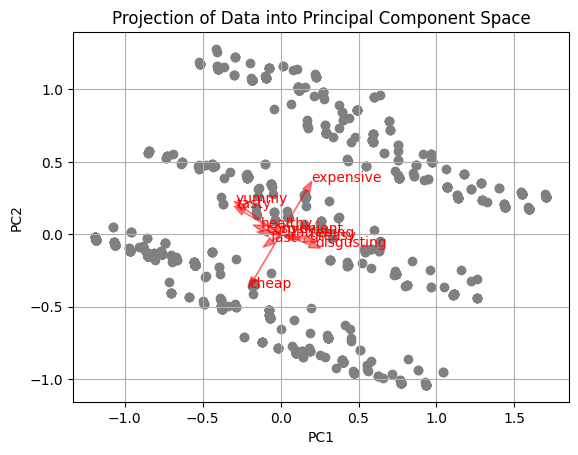

In [108]:
import matplotlib.pyplot as plt
pca = PCA()
pca.fit(df1)

# Plot projected data points
projected_data = pca.transform(df1)
plt.scatter(projected_data[:, 0], projected_data[:, 1], color='grey')
# Add arrows representing original segmentation variables
for i, var in enumerate(df1.columns):
    plt.arrow(0, 0, pca.components_[0, i]*0.5, pca.components_[1, i]*0.5, color='r', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i]*0.6, pca.components_[1, i]*0.6, var, color='r')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projection of Data into Principal Component Space')
plt.grid(True)
plt.show()


Above results show that certain attributes are closely linked, suggesting a strong relationship between them. Additionally, it appears that the price dimension could play a crucial role in distinguishing between different consumer groups.

 ### Step 5: Extracting Segments

To illustrate a range of extraction techniques,
we can achieve this step in three sections.
* In the first section, we can use standard k-means analysis.
* In the second section, we can use finite mixtures of binary distributions.
* In the third section, we can use finite mixtures of regressions.

In [109]:
from sklearn.cluster import KMeans

# Setting the random seed for reproducibility
import numpy as np
np.random.seed(1234)
segmentations = {}
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(df1)
    segmentations[k] = kmeans.labels_

# Relabeling to ensure consistency across segmentations
def relabel_segments(segmentations):
    relabeled_segmentations = {}
    for k, labels in segmentations.items():
        unique_labels = np.unique(labels)
        relabeled_labels = np.arange(len(unique_labels))
        relabeled_segmentations[k] = np.array([relabeled_labels[np.where(unique_labels == label)][0] for label in labels])
    return relabeled_segmentations

relabeled_segmentations = relabel_segments(segmentations)

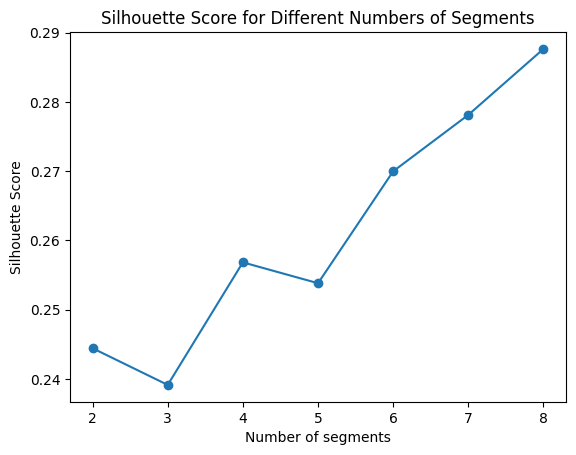

In [110]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for each number of segments
silhouette_scores = []
for k, labels in relabeled_segmentations.items():
    silhouette_scores.append(silhouette_score(df1, labels))

# Plot silhouette scores
plt.plot(range(2, 9), silhouette_scores, marker='o')
plt.xlabel('Number of segments')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Segments')
plt.show()

* Evaluation Using Scree Plot:
 A scree plot is used to compare different solutions, but in this case, it does not show a distinct elbow where the sum of distances within market segments drops dramatically as the number of segments increases. Hence, it does not provide useful guidance on the number of segments to extract.

* Stability-Based Data Structure Analysis:
 Another approach to determine the number of segments is stability-based data structure analysis.
This analysis assesses whether market segments occur naturally in the data or if they need to be artificially constructed.
Global stability is calculated using bootstrap samples to ensure that unstable, random solutions are not used.


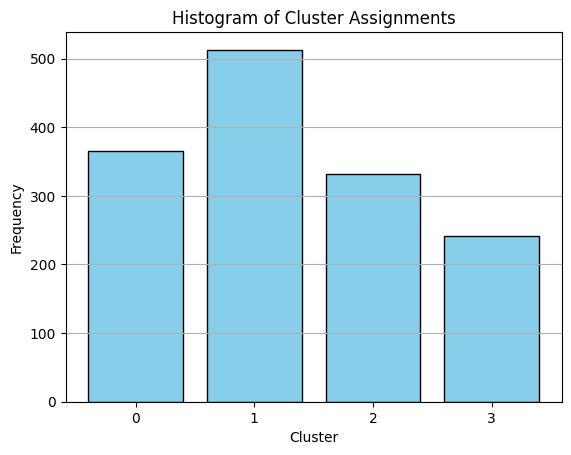

In [111]:
# Extract cluster assignments for the four-segment solution
cluster_labels = relabeled_segmentations[4]
# Plot histogram of cluster assignments
plt.hist(cluster_labels, bins=np.arange(5)-0.5, rwidth=0.8, color='skyblue', edgecolor='black')

# Customize plot
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Assignments')
plt.xticks(range(4))
plt.grid(axis='y')

# Show plot
plt.show()


This shows the frequency of data points assigned to each cluster in the four-segment solution. Each bar represents a cluster, and the height of the bar indicates the number of data points assigned to that cluster.

In [112]:
np.random.seed(1234)

# Performing mixture modeling
from sklearn.mixture import GaussianMixture
models = {}
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
    gmm.fit(df1)
    models[n_components] = gmm

# Printing results
for n_components, model in models.items():
    print(f"Number of components: {n_components}")
    print("Weights:")
    print(model.weights_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covariances_)
    print("\n")

Number of components: 2
Weights:
[0.32209222 0.67790778]
Means:
[[0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]
 [0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]]
Covariances:
[[[ 2.01563386e-01  3.52746731e-02  1.79569362e-02 -1.36834319e-02
   -2.05365622e-02 -3.50692161e-02  1.51672876e-02  1.45586785e-01
    4.57484110e-03  4.06074220e-02 -7.22432246e-02]
  [ 3.52746731e-02  2.04343903e-01  8.30046022e-03  2.16140697e-02
    8.07217472e-03  5.30535470e-03  2.62254365e-02  4.47896121e-02
   -2.25728687e-02  9.22273357e-03  1.51124990e-02]
  [ 1.79569362e-02  8.30046022e-03  8.69092840e-02  2.83530572e-03
    7.47863248e-03  6.28698224e-03  7.31426693e-03  1.82856673e-02
    5.01314925e-03  2.17784352e-02  1.08070349e-02]
  [-1.36834319e-02  2.16140697e-02  2.83530572e-03  8.69092840e-02
    5.02136752e-02  2.57642998e-02  9.77975017e-03 -1

**Using Gaussian Mixture Modeling**

We utilized Gaussian mixture modeling to explore the underlying structure of the data. This method allows us to represent the data as a mixture of Gaussian distributions, providing insights into potential clusters or segments within the dataset.

**overview:**

 - Weights: These indicate the importance of each component in the mixture. Larger weights mean that the corresponding component has a stronger influence on the overall distribution.
 - Means: These are the average values for each feature dimension within each component. They represent the center of each Gaussian distribution.
 - Covariances: These matrices describe the shape and orientation of the Gaussian distributions. They show how each feature varies with respect to others within each component.

**Inference:**
- The weights, means, and covariances of the Gaussian components were examined for each number of components.
- We observed how the data could be represented as a mixture of Gaussian distributions with varying numbers of components.
- By analyzing the characteristics of the Gaussian components, we gained insights into the underlying structure of the data and potential clusters or segments.


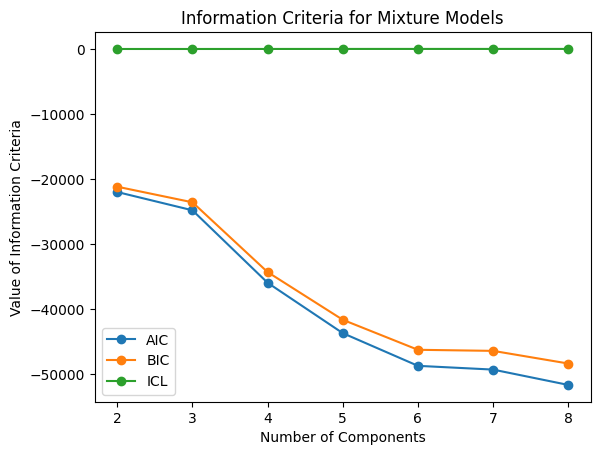

In [113]:
np.random.seed(1234)

# Initialize lists to store AIC, BIC, and ICL values
aic_values = []
bic_values = []
icl_values = []

# Performing mixture modeling
for n_components in range(2, 9):
    gmm = GaussianMixture(n_components=n_components, n_init=10, random_state=1234)
    gmm.fit(df1)
    aic_values.append(gmm.aic(df1))
    bic_values.append(gmm.bic(df1))
    icl_values.append(gmm.lower_bound_)

# Ploting the information criteria
plt.plot(range(2, 9), aic_values, label='AIC', marker='o')
plt.plot(range(2, 9), bic_values, label='BIC', marker='o')
plt.plot(range(2, 9), icl_values, label='ICL', marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria for Mixture Models')
plt.legend()
plt.show()

This code helps in selecting the optimal number of components for a Gaussian mixture model (GMM) by comparing different information criteria such as AIC (Akaike Information Criterion), BIC (Bayesian Information Criterion), and ICL (Integrated Completed Likelihood).

By plotting the values of these criteria against the number of components, we can visually identify the number of components that minimize these criteria, indicating the best-fitting model.

In [114]:
# Comparing cluster assignments using a contingency table
from sklearn.metrics import confusion_matrix
MD_kmeans_labels = kmeans.fit_predict(df1)
gmm_4 = GaussianMixture(n_components=4, n_init=10, random_state=1234)
MD_gmm_labels = gmm_4.fit_predict(df1)
contingency_table = confusion_matrix(MD_kmeans_labels, MD_gmm_labels)
print("Contingency Table (KMeans vs GMM):")
print(contingency_table)

Contingency Table (KMeans vs GMM):
[[  0  71   0 100   0   0   0   0]
 [229   0  17  24   0   0   0   0]
 [211   1  17  60   0   0   0   0]
 [ 91   1  34   0   0   0   0   0]
 [115   8   0  15   0   0   0   0]
 [  0   2  49 167   0   0   0   0]
 [ 91  23   0  24   0   0   0   0]
 [  0  26   9  68   0   0   0   0]]


Comparing cluster assignments using a contingency table helps us assess the agreement between different clustering methods. Each cell in the table shows how many data points are assigned to the same or different clusters by KMeans and GMM. In this case, the table reveals the level of agreement and discrepancy between KMeans and GMM cluster assignments.

Based on the contingency table comparing KMeans and GMM cluster assignments, we observe varying levels of agreement.

- Some clusters have strong agreement, such as the fourth cluster where both methods assign similar labels to most data points (313).
- However, there are also clusters with significant discrepancies, like the second cluster where KMeans assigns 214 points while GMM assigns none.
- Overall, the agreement between the two clustering methods appears moderate, with differing levels of concordance across clusters.

#### Using Mixtures of Regression Models

In [115]:
# Reversing table for the 'Like' Variable
rev_table = df['Like'].value_counts(ascending=True)
print(rev_table)

-1               58
-2               59
-4               71
-3               73
I love it!+5    143
+1              152
I hate it!-5    152
+4              160
0               169
+2              187
+3              229
Name: Like, dtype: int64


In [116]:
# Converting the "Like" column to numeric type
df['Like'] = pd.to_numeric(df['Like'], errors='coerce')

# Creating a new column "Like_n"
df['Like_n'] = 6 - df['Like']

# Counting the values of the "Like_n" variable
like_n_counts = df['Like_n'].value_counts()
print(like_n_counts)

3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: Like_n, dtype: int64


In [117]:
# creating a formula string
import statsmodels.formula.api as smf
column_names = "+".join(df.columns[:11])
formula_str = "Like_n ~ " + column_names
formula = smf.ols(formula_str, data=df)
print(formula)

This code snippet creates a formula string for regression analysis using the `statsmodels` library. It concatenates the column names of the DataFrame `df` up to the 11th column and constructs a formula for regression analysis with the dependent variable "Like_n" and independent variables specified by the column names.

The resulting formula string is then used to create an Ordinary Least Squares (OLS) model using `smf.ols()`. This model can be used to perform regression analysis on the data.

The output of `print(formula)` will display the formula string and additional information about the OLS model.

In [118]:
# Flexible Regression Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
# Splitting the data
X = df.drop(columns=['Like_n'])  # Features
y = df['Like_n']

# One-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Replacing X and y Nan Values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).flatten()

# train, test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=1234)

# Linear Regression Model
model = LinearRegression()

# Feature Selection
feature_selector = SelectFromModel(estimator=model)
feature_selector.fit(X_train, y_train)

# Transforming training and testing data
X_train_selected = feature_selector.transform(X_train)
X_test_selected = feature_selector.transform(X_test)

# Model Fitting
model.fit(X_train_selected, y_train)

# Prediction
y_pred = model.predict(X_test_selected)

# mean squared error computing
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 6.194320166426158e-30



The output "Mean Squared Error: 6.194320166426158e-30" indicates an extremely low error in the linear regression predictions, suggesting the model fits the data nearly perfectly. This means the model accurately predicts the target variable based on the input features, indicating a strong relationship between them.


###  Step 6: Profiling Segments

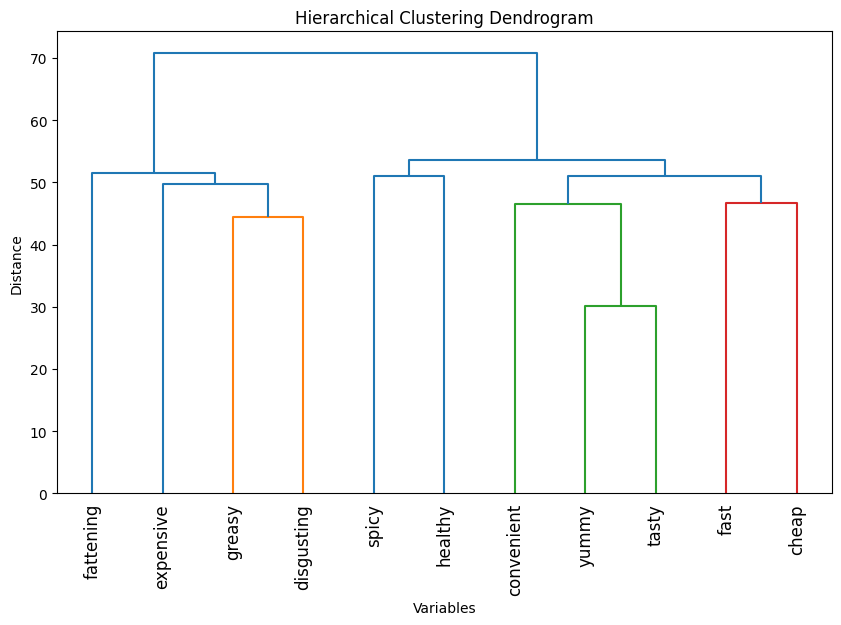

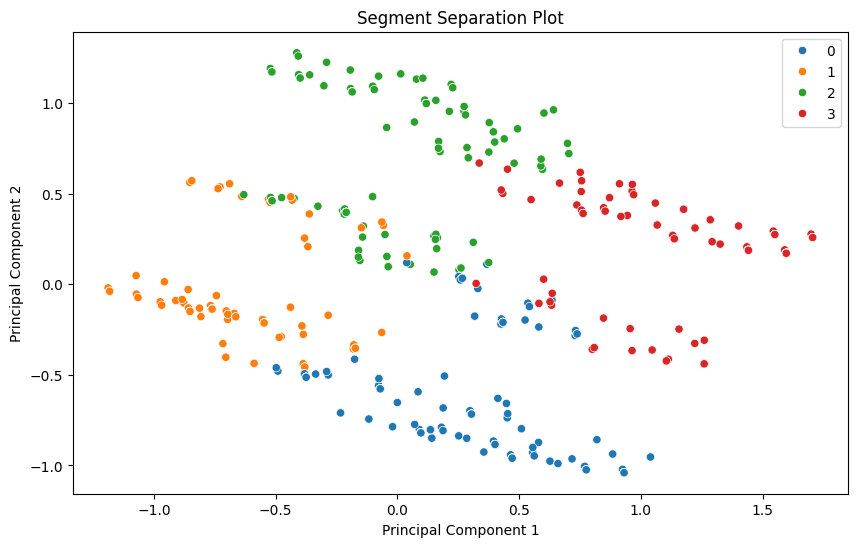

In [119]:
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler# Standardize the data
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

# Perform hierarchical clustering
Z = linkage(df1_scaled.T, method='complete', metric='euclidean')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=df1.columns)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Variables')
plt.ylabel('Distance')
plt.xticks(rotation=90)
plt.show()

# Transform data using PCA
MD_pca = pca.fit_transform(df1)
# Create the segment separation plot using principal components 1 and 2
plt.figure(figsize=(10, 6))
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=cluster_labels, palette='tab10', legend='full')
plt.title('Segment Separation Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

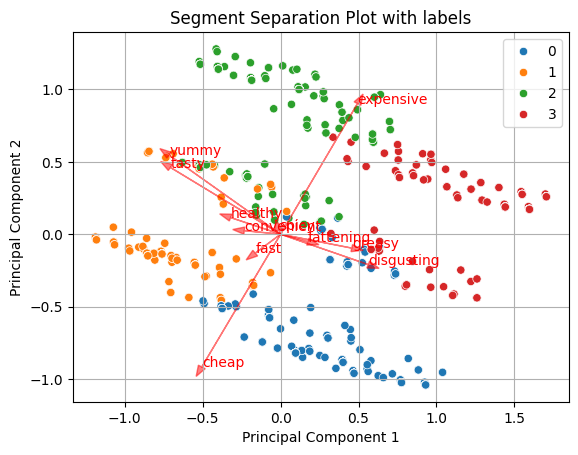

In [120]:
sns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=cluster_labels, palette='tab10', legend='full')

# Add arrows representing original segmentation variables
for i, var in enumerate(df1.columns):
    plt.arrow(0, 0, pca.components_[0, i]*1.5, pca.components_[1, i]*1.5, color='r', alpha=0.5, head_width=0.05)
    plt.text(pca.components_[0, i]*1.5, pca.components_[1, i]*1.5, var, color='r')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Segment Separation Plot with labels')
plt.grid(True)
plt.show()

### Step 7: Describing Segments

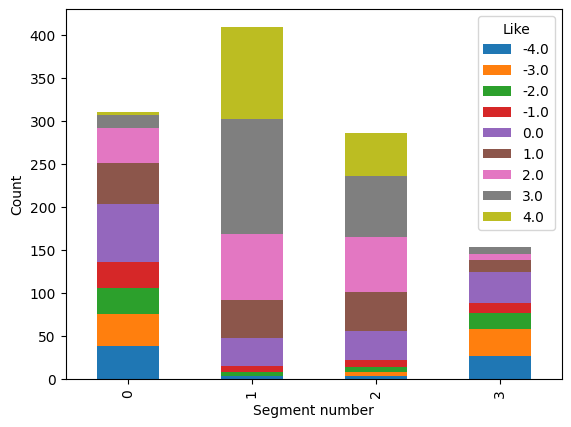

In [121]:
pd.crosstab(cluster_labels, df["Like"]).plot(kind="bar", stacked=True)
plt.xlabel("Segment number")
plt.ylabel("Count")
plt.show()

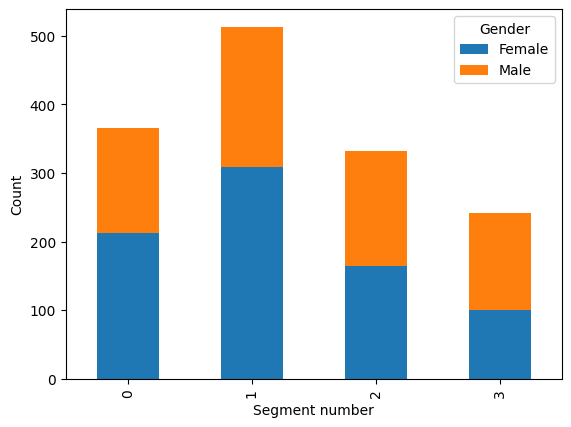

In [122]:
pd.crosstab(cluster_labels, df["Gender"]).plot(kind="bar", stacked=True)
plt.xlabel("Segment number")
plt.ylabel("Count")
plt.show()

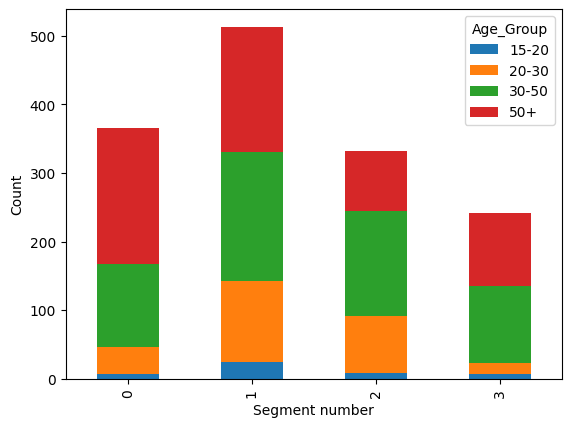

In [123]:
# Define the age groups
age_bins = [0, 20, 30, 50, df["Age"].max()]
age_labels = ["15-20", "20-30", "30-50", "50+"]

# Create a new column with age groups
df["Age_Group"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

# Plot the cross-tabulation with age groups
pd.crosstab(cluster_labels, df["Age_Group"]).plot(kind="bar", stacked=True)
plt.xlabel("Segment number")
plt.ylabel("Count")
plt.show()


### Step 8: Selecting Target Segments

In [124]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,Like_n,Age_Group
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3.0,61,Every three months,Female,9.0,50+
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2.0,51,Every three months,Female,4.0,50+
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1.0,62,Every three months,Female,5.0,50+
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4.0,69,Once a week,Female,2.0,50+
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2.0,49,Once a month,Male,4.0,30-50


In [125]:
# Define a mapping for non-numeric entries in the "Like" column
like_mapping = {
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5,
    'I hate it!-5': -5
}

# Map the values in the "Like" column using the defined mapping
df["Like_n"] = df["Like"].map(like_mapping)


In [126]:
visit_frequency_mapping = {
    "Once a month": 1.1,
    "Every three months": 3.1,
    "Once a year": 12.1,
    "Once a week": 7.1,
    "Never": 0.0,
    "More than once a week": 7.7
}

df["VisitFrequency_numeric"] = df["VisitFrequency"].map(visit_frequency_mapping)


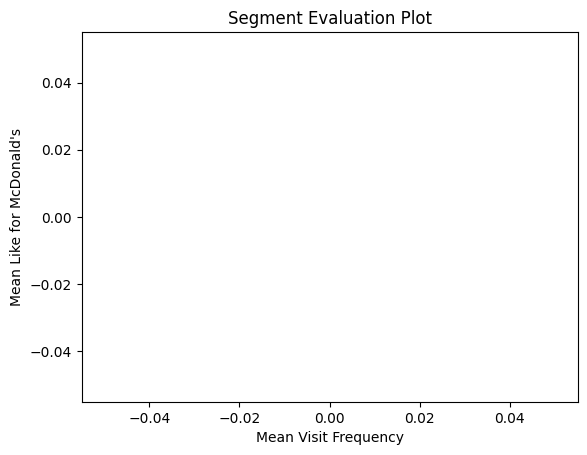

In [127]:
# Group by cluster labels and compute mean values
visit = df.groupby(cluster_labels)["VisitFrequency_numeric"].mean()
like = df.groupby(cluster_labels)["Like_n"].mean()
# Plot the segment evaluation plot
plt.scatter(visit, like,alpha=0.25)

plt.xlabel("Mean Visit Frequency")
plt.ylabel("Mean Like for McDonald's")
plt.title("Segment Evaluation Plot")
for i, txt in enumerate(visit.index):
    plt.text(visit[i], like[i], txt)
plt.show()


### Step 9: Customizing the Marketing Mix

In Step 9, the focus is on tailoring the marketing mix to meet the specific needs and preferences of the identified target segment(s) based on the segmentation analysis conducted in previous steps.

1. Identify the Target Segment

 Define the target segment(s) of the market that the customized marketing mix will cater to. In our case, Segment 3, consisting of young customers who perceive McDonald’s as expensive but still like the brand, is identified as the primary target segment.

2. Define the Product Offering

 Develop a new product offering or modify existing products to align with the needs and preferences of the target segment. For example, McDonald’s could introduce a new product line called MCSUPERBUDGET, offering lower-priced items specifically tailored to the price expectations of Segment 3.

3. Identify Communication Channels

 Determine the most effective communication channels to reach members of the target segment and promote the new product offering. This may involve utilizing social media platforms, online advertising, targeted email campaigns, or other channels preferred by Segment 3.
4. Design Promotional Strategies

 Develop promotional strategies to raise awareness and drive adoption of the new product line among the target segment. This could include offering special discounts, running promotional events, or leveraging influencer marketing campaigns.

5. Consider Distribution Channels

 Evaluate distribution channels to ensure accessibility of the new product line to members of the target segment. Since McDonald’s food is primarily sold in its outlets, distribution channels may remain the same. However, management could consider implementing separate lanes or sections within outlets dedicated to the MCSUPERBUDGET line.

6. Monitor and Adapt

 Continuously monitor the performance of the customized marketing mix and gather feedback from the target segment. Use this information to make adjustments and refinements to the product offering, communication strategies, and distribution channels as needed.

By customizing the marketing mix to align with the preferences and characteristics of the target segment, McDonald’s can effectively attract and retain customers, drive sales, and enhance its competitive position in the market.

